# Auteur: rodrigue MAHI NDOUNG

![photo profil](https://avatars.githubusercontent.com/u/148294447?s=400&u=bcc84613a26fddaba7aa3cb93803cb78e7a46220&v=4)

### projet 0

# analyse d'une campagne marketing avec pandas #

## Importation des librairies

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import gzip
import matplotlib.pyplot as plt
import seaborn as sns
import json


In [4]:
import dash

## Importation des données

In [5]:
marketing_df=pd.read_csv('https://raw.githubusercontent.com/JosueAfouda/Marketing-Pandas/master/marketing.csv')
marketing_df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [6]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


## Résumé statistique

In [7]:
marketing_df.describe().T


,count,unique,top,freq
user_id,10037,7309,a100000882,12
date_served,10021,31,1/15/18,789
marketing_channel,10022,5,House Ads,4733
variant,10037,2,control,5091
converted,10022,2,False,8946
language_displayed,10037,4,English,9793
language_preferred,10037,4,English,9275
age_group,10037,7,19-24 years,1682
date_subscribed,1856,31,1/16/18,163
date_canceled,577,115,4/2/18,15


canaux marketing utilisé par l'entreprise 

In [8]:
marketing_df['marketing_channel'].value_counts()

House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64

In [118]:
marketing_df['language_displayed'].nunique()

4

In [120]:
marketing_df['age_group'].nunique()

7

In [119]:
marketing_df['language_preferred'].nunique()

4

In [10]:
marketing_df['marketing_channel'].value_counts(normalize=True)

House Ads    0.472261
Instagram    0.186689
Facebook     0.185592
Push         0.099082
Email        0.056376
Name: marketing_channel, dtype: float64

l'entreprise utilise majoritairement un peu plus de 47% les annonces auto-promotionnelles

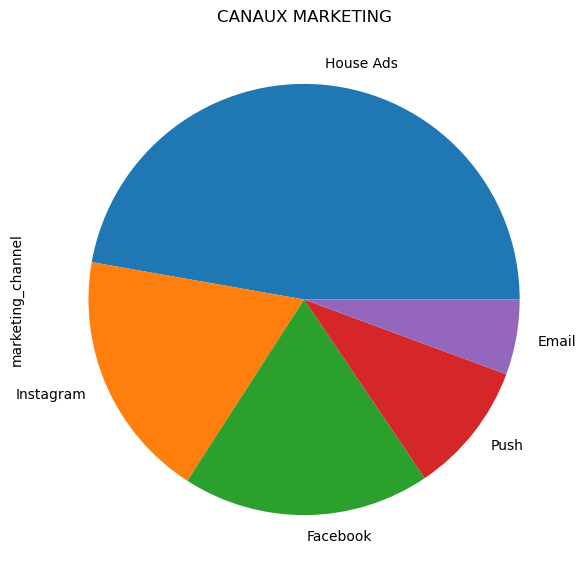

In [105]:
plt.figure(figsize=(7,7))
marketing_df['marketing_channel'].value_counts(normalize=True).plot(kind="pie")
plt.title("CANAUX MARKETING")
plt.show();

In [113]:
marketing_df['marketing_channel'].unique()

array(['House Ads', 'Push', 'Facebook', 'Instagram', 'Email', nan],
      dtype=object)

variables de dates au format datetime

In [12]:
for col in ['date_served','date_subscribed','date_canceled']:
    marketing_df[col]=pd.to_datetime(marketing_df[col])
    

vérification

In [13]:
marketing_df.dtypes

user_id                        object
date_served            datetime64[ns]
marketing_channel              object
variant                        object
converted                      object
language_displayed             object
language_preferred             object
age_group                      object
date_subscribed        datetime64[ns]
date_canceled          datetime64[ns]
subscribing_channel            object
is_retained                    object
dtype: object

ces variables sont maintenant dans un bon format

Quel est le nombre d'utilisateur retenu par la campagne marketing?

In [15]:
marketing_df["is_retained"].sum()

1279

In [16]:
marketing_df["is_retained"].value_counts()

True     1279
False     577
Name: is_retained, dtype: int64

In [17]:
marketing_df["is_retained"].value_counts(normalize=True)

True     0.689116
False    0.310884
Name: is_retained, dtype: float64

1279 utilisateurs qui ont été retenues par la campagne marketing, équivaut à 69% 

In [18]:
marketing_df['subscribing_channel'].nunique()

5

In [19]:
marketing_df['subscribing_channel'].unique()

array(['House Ads', 'Email', 'Push', 'Facebook', 'Instagram', nan],
      dtype=object)

création de nouvelles colonnes

In [ ]:
on veut créer une nouvelle variable: channel_code par encodage des modalités de la variable subscribing_channel

on veut connaitre les  utilisateurs uniques qui voient qui les annonces marketing chaque jour

In [20]:
dict_channels={'House Ads': 1, 'Email': 2, 'Facebook': 3, 'Push': 4, 'Instagram': 5}
dict_channels

{'House Ads': 1, 'Email': 2, 'Facebook': 3, 'Push': 4, 'Instagram': 5}

In [21]:
marketing_df['channels_code']=marketing_df['subscribing_channel'].map(dict_channels)
marketing_df['channels_code']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
10032    2.0
10033    2.0
10034    2.0
10035    2.0
10036    2.0
Name: channels_code, Length: 10037, dtype: float64

on crée une autre variable is_correct_lang qui est égal à "yes" si l'utilisateur a vu l'annonce marketing à sa langue préférée 
et "NO" dans le cas contraire

In [22]:
marketing_df['is_correct_lang ']=np.where(marketing_df['language_displayed']==marketing_df['language_preferred'],
                                          "yes", "NO" )
marketing_df['is_correct_lang ']

0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
10032    yes
10033    yes
10034    yes
10035    yes
10036    yes
Name: is_correct_lang , Length: 10037, dtype: object

on crée une autre variable DOW qui réprésente le jour de la semaine

In [23]:
marketing_df['DOW']=marketing_df['date_subscribed'].dt.dayofweek
marketing_df['DOW'].head(30)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
Name: DOW, dtype: float64

In [ ]:
on veut connaitre les utilisateurs uniques qui voient qui les annonces marketing chaque jour

In [26]:
marketing_df['user_id'].nunique()

7309

In [27]:
marketing_df['user_id'].unique()

array(['a100000029', 'a100000030', 'a100000031', ..., 'a100007292',
       'a100007293', 'a100007294'], dtype=object)

ceci est crucial pour connaitre l'effort de l'efficacité marketing aucours du dernier mois

In [28]:
marketing_df['date_served'].unique() 

array(['2018-01-01T00:00:00.000000000', '2018-01-02T00:00:00.000000000',
       '2018-01-03T00:00:00.000000000', '2018-01-04T00:00:00.000000000',
       '2018-01-05T00:00:00.000000000', '2018-01-06T00:00:00.000000000',
       '2018-01-07T00:00:00.000000000', '2018-01-08T00:00:00.000000000',
       '2018-01-09T00:00:00.000000000', '2018-01-10T00:00:00.000000000',
       '2018-01-11T00:00:00.000000000', '2018-01-12T00:00:00.000000000',
       '2018-01-13T00:00:00.000000000', '2018-01-14T00:00:00.000000000',
       '2018-01-15T00:00:00.000000000', '2018-01-16T00:00:00.000000000',
       '2018-01-17T00:00:00.000000000', '2018-01-18T00:00:00.000000000',
       '2018-01-19T00:00:00.000000000', '2018-01-20T00:00:00.000000000',
       '2018-01-21T00:00:00.000000000', '2018-01-22T00:00:00.000000000',
       '2018-01-23T00:00:00.000000000', '2018-01-24T00:00:00.000000000',
       '2018-01-25T00:00:00.000000000', '2018-01-26T00:00:00.000000000',
       '2018-01-27T00:00:00.000000000', '2018-01-28

In [29]:
daily_user=marketing_df.groupby('date_served')['user_id'].nunique()
daily_user

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
2018-01-06    308
2018-01-07    275
2018-01-08    312
2018-01-09    312
2018-01-10    337
2018-01-11    310
2018-01-12    301
2018-01-13    306
2018-01-14    305
2018-01-15    767
2018-01-16    388
2018-01-17    369
2018-01-18    318
2018-01-19    305
2018-01-20    311
2018-01-21    229
2018-01-22    178
2018-01-23    172
2018-01-24    190
2018-01-25    184
2018-01-26    222
2018-01-27    320
2018-01-28    320
2018-01-29    319
2018-01-30    317
2018-01-31    340
Name: user_id, dtype: int64

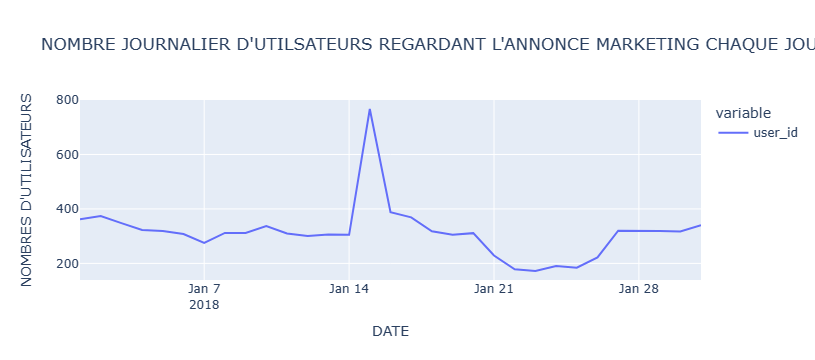

In [103]:

fig_line_look = px.line(
    daily_user,title="NOMBRE JOURNALIER D'UTILSATEURS REGARDANT L'ANNONCE MARKETING CHAQUE JOUR"
      
)
fig_line_look.update_layout(xaxis_title="DATE", yaxis_title="NOMBRES D'UTILISATEURS")
fig_line_look.show()

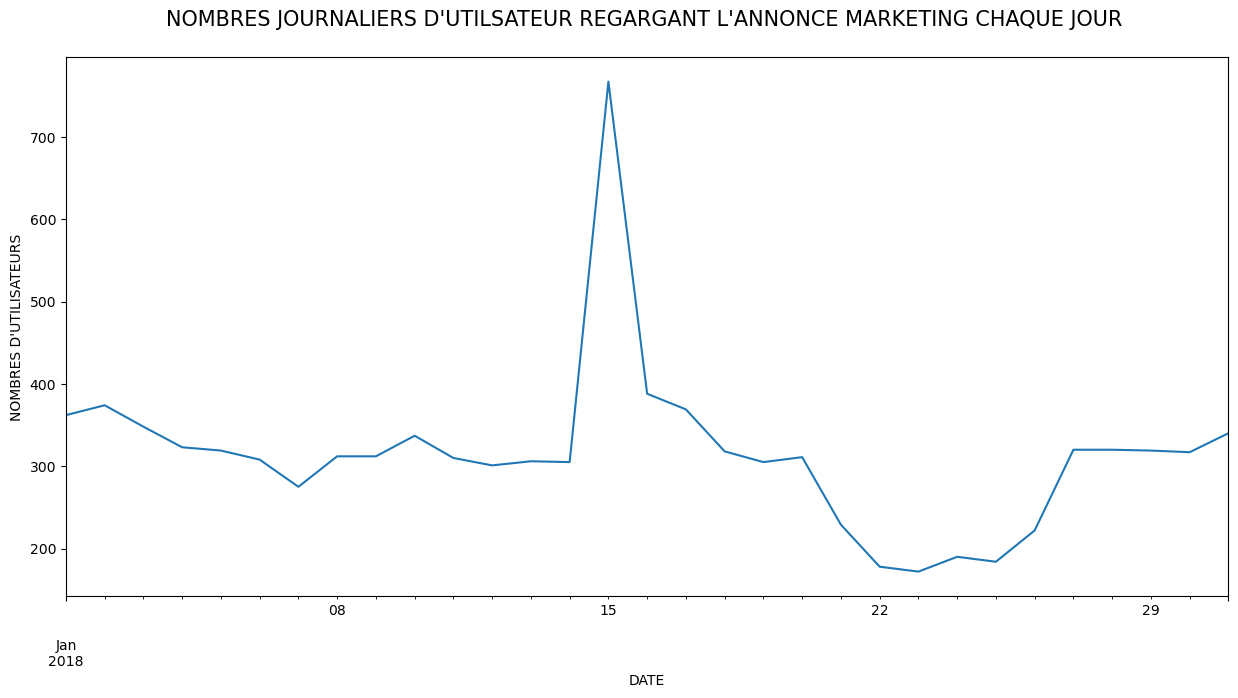

In [33]:
plt.figure(figsize=(15, 7)),
daily_user.plot.line(),
plt.xlabel("DATE"),
plt.ylabel("NOMBRES D'UTILISATEURS"),
plt.title("NOMBRES JOURNALIERS D'UTILSATEUR REGARGANT L'ANNONCE MARKETING CHAQUE JOUR \n", fontsize=15),
plt.show();

INTERprétation: on voit que les deux premieres semaines on a entre 300 ET 400 utilisateurs
qui ont vu la campagne marketing, et qu'il y'a eu un pic le 15 ème jour,
qui peut etre du on fait que l'entreprise a mene une grosse campagne  par mail qui 
a atteint des utilisateurs qui n'étaient pas des 
visiteurs quotidien du site.


# QUELQUES INDICATEURS CLES DE PERFORMANCES #

UNE campagne marketing a t'elle réussi? on mesure le succès d'une campagne marketing
par le taux de conversion
(c'est le pourcentage d' utilisateurs qui ont vu les annonces marketing et sz sont ensuite abonnés)
                          et le taux de rétention 
    ( c'est le pourcentage de personnes qui restent abonné pendant une certaine période : un mois, 3mois,un an,)

calculons le taux de conversion globale:

# Calculons le Taux de conversion

In [ ]:
marketing_df.info()

In [31]:
# nombre d'utilisateurs uniques

n_unique_users=marketing_df['user_id'].nunique()
print("Le nombre d'utilisateur unique est:",n_unique_users)

# nombre d'utilisateur uniques ayant souscrit aux services
n_souscripteur=marketing_df[marketing_df['converted']==True]['user_id'].nunique()
print('\n')
print("Le nombre d'utilisateur unique ayant souscrit aux services est:",n_souscripteur)



#Taux de conversion
taux_conv_global= n_souscripteur/n_unique_users
print('\n')

print("Le taux de convesion globale est de :", round(taux_conv_global *100, 2), "%")

Le nombre d'utilisateur unique est: 7309


Le nombre d'utilisateur unique ayant souscrit aux services est: 1015


Le taux de convesion globale est de : 13.89 %


Vous demandez si c'est un bon taux de conversion ? cela dépendra fortement de votre entripse.
Il y'a pas un nombre particulier que les équipes marketing tentent d'atteindre, il est utile d'éxaminer les données historiques pour déterminer si un taux de conversion correspond à ce dont vous pouvez atteindre.

Vous calculerez le taux de rétention ou le nombre d'abonnés restants des utilisateurs qui se sont convertis
à votre produit.cela permettra de savoir si votre campagne marketing a converti des abonnés réellement intéressés
par le produit.

N.B: IL EST IMPORTANT DE FOURNIR DES INFORMATIONS AUX DECIDEURS DE L'ENTREPRISE SUR LE NOMBRE D'UTILISATEURS
QUI restent ABONNES

# CALCULONS LE TAUX DE RETENTION GLOBALE # 

# CALCULONS LE TAUX DE RETENTION GLOBALE  du mois# 

CALCULONS LE nombre de personnes qui sont restés abonnés

In [32]:
retained=marketing_df[marketing_df['is_retained']==True]['user_id'].nunique()
print("Le nombre de personnes qui sont restés abonnés",retained)
print('\n')
# LE TAUX DE RETENTION 
taux_retention_globale=retained/n_souscripteur
print("Le taux de retention globale",round(taux_retention_globale*100, 2),"%")


Le nombre de personnes qui sont restés abonnés 678


Le taux de retention globale 66.8 %


tout comme le taux de conversion , il y' a pas un taux standard qui s'appliquera aux entreprises et aux industries
Regarder les taux de rétention historiques ou 
les taux de rétentions des entreprises dans un secteur similaire pour interpréter vos résultats.


# SEGMETATION DE LA CLIENTELE

N.B: pour plus de'efficacité on fait la segmentaion

Au lieu de calculer le taux de conversion et taux de rétention on peut les calculer par groupe d'age
par exemple.on regroupe par caractéristique: c'est la segmentation.


# Le taux de retention par canal de souscription

pour ce fait on calcul le nombre total d'utilisateur retenus par ce canal 
divisé par le nombre total d'utilisateurs ayant souscrit à un abonnement via ce canal.

# le nombre total d'utilisateur retenus par canal marketing

In [33]:
n_retained_per_canal=marketing_df[marketing_df['is_retained']==True].groupby('subscribing_channel')['user_id'].nunique()
print( n_retained_per_canal)

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64


In [34]:
n_retained_per_canal=marketing_df[marketing_df['is_retained']==True].groupby('subscribing_channel')['user_id'].nunique()
print("le nombre total d'utilisateur retenus par  canal:", n_retained_per_canal)

le nombre total d'utilisateur retenus par  canal: subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64


pour chaque canal de souscription,
calcuons le nombre total d'utilisateurs du site web ayant souscrit à un abonnement.

In [ ]:
#  nombre total d'utilisateurs du site web ayant souscrit à un abonnement via chaque canal

In [35]:
n_converted_per_canal=marketing_df[marketing_df['converted']==True].groupby('subscribing_channel')['user_id'].nunique()
print( n_converted_per_canal)

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64


In [36]:
n_converted_per_canal=marketing_df[marketing_df['converted']==True].groupby('subscribing_channel')['user_id'].nunique()
print("le nombre total d'utilisateur du site web ayant souscrit à un abonnement via chaque canal:", n_converted_per_canal)

le nombre total d'utilisateur du site web ayant souscrit à un abonnement via chaque canal: subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64


 nous pouvons maintenant calculer le taux de retention par canal de souscription:

In [37]:
# Le taux de retention par canal de souscription
taux_retention_par_canal= (n_retained_per_canal/n_converted_per_canal)*100
taux_retention_par_canal.sort_values(ascending=False)

subscribing_channel
Email        87.577640
Push         70.129870
Facebook     68.778281
Instagram    68.103448
House Ads    58.053691
Name: user_id, dtype: float64

# visualisation des résultats

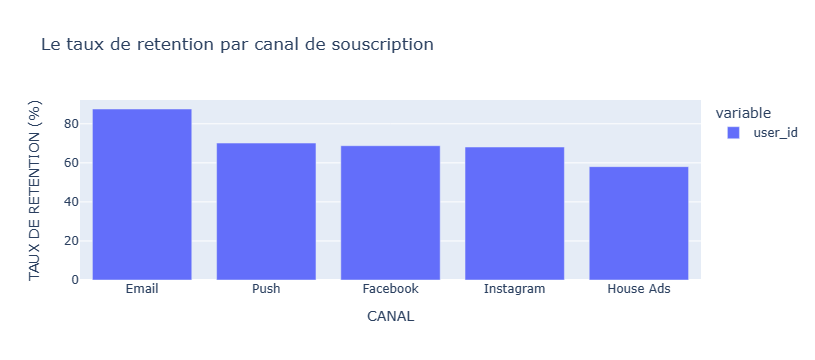

In [39]:
# Create side-by-side bar chart of `xgb`
bar_fig = px.bar(
   taux_retention_par_canal.sort_values(ascending=False),
   title="Le taux de retention par canal de souscription" 
)
bar_fig.update_layout(xaxis_title="CANAL",yaxis_title="TAUX DE RETENTION\n(%)")
bar_fig.show()

In [76]:
# importation des librairies
import dash
from dash import Input, Output, State, dcc, html
import dash_core_components as dcc
from jupyter_dash import JupyterDash
app = JupyterDash(__name__)
app.layout = html.Div( 
    [
        # Application title
        html.H1("Analyse de la campagne marketing"),
        dcc.Graph(id= "line-graph", figure=fig_line),
        # Bar chart element
        # bar chart graph
        dcc.Graph(id= "example-graph", figure=bar_fig),
    ]
)
if __name__ == "__main__":
    app.run(jupyter_mode="external")
    
    
    
    

Dash app running on http://127.0.0.1:8050/


C:\Users\lenovo\anaconda3\lib\site-packages\dash\dash.py:538: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



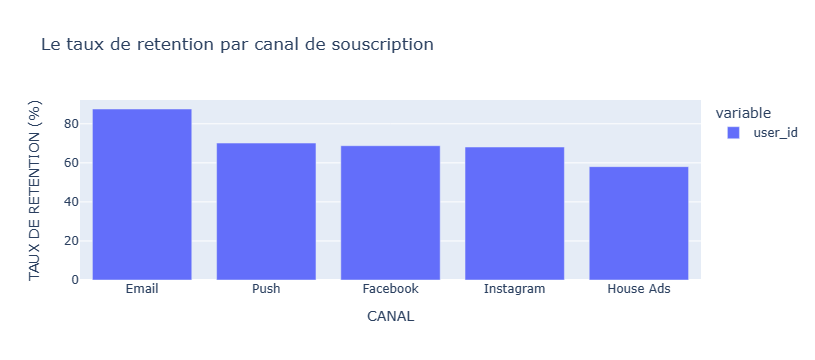

In [40]:
# Create side-by-side bar chart of `xgb`
fig = px.bar(
   taux_retention_par_canal.sort_values(ascending=False),
   title="Le taux de retention par canal de souscription" 
)
fig.update_layout(xaxis_title="CANAL",yaxis_title="TAUX DE RETENTION\n(%)")
fig.show()

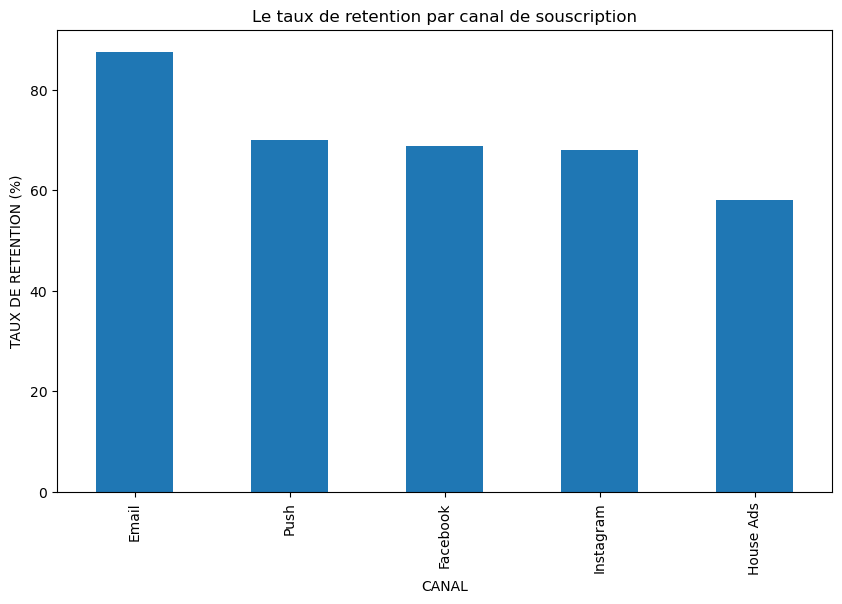

In [41]:
plt.figure(figsize=(10,6)),
taux_retention_par_canal.sort_values(ascending=False).plot(kind="bar"),
plt.xlabel("CANAL"),
plt.ylabel("TAUX DE RETENTION (%)"),
plt.title("Le taux de retention par canal de souscription")
plt.show();

# Automatisation du calcul du taux de rétention

on crée une fonction

In [42]:
def retention_rate(dataframe, column_names):
    retained=dataframe[dataframe['is_retained']==True].groupby(column_names)['user_id'].nunique()
    
    converted=dataframe[dataframe['converted']==True].groupby(column_names)['user_id'].nunique()
    
    retention_rate= ((retained / converted)* 100).sort_values(ascending=False)
    
    
    return retention_rate


vérifions si la fonction marche bien, en recalculant le taux de rétention par canal

In [43]:
retention_rate(marketing_df, ['subscribing_channel'])

subscribing_channel
Email        87.577640
Push         70.129870
Facebook     68.778281
Instagram    68.103448
House Ads    58.053691
Name: user_id, dtype: float64

N.B: la fonction marche bien on a le meme résultat

Appliquons cette fonction pour calculer le taux de retention selon la langue d'affichage d'annonce

# taux de rétention par langue d'annonce affichée

In [44]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
 12  channels_code        1856 non-null   float64       
 13  is_correct_lang      10037 non-

In [45]:
taux_retention_par_langue=retention_rate(marketing_df, ['language_displayed'])
taux_retention_par_langue

language_displayed
Spanish    100.000000
German      77.358491
Arabic      75.000000
English     66.846652
Name: user_id, dtype: float64

In [46]:
retention_rate(marketing_df, ['language_displayed'])

language_displayed
Spanish    100.000000
German      77.358491
Arabic      75.000000
English     66.846652
Name: user_id, dtype: float64

# visualisation des résultats

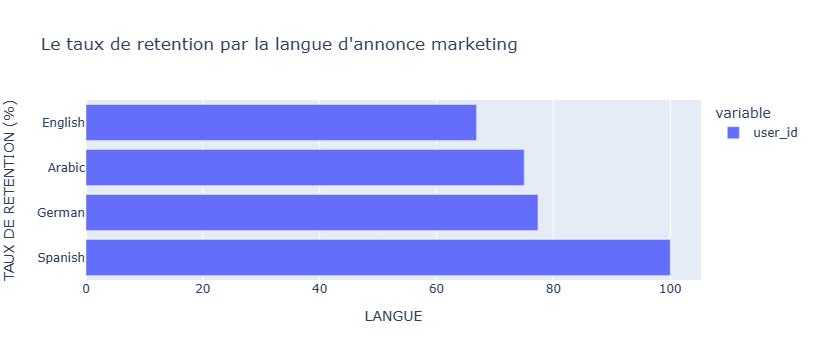

In [101]:
# Create side-by-side bar chart of `xgb`
fig_lang_retention = px.bar(
   taux_retention_par_langue.sort_values(ascending=False),
   orientation="h", 
   title="Le taux de retention par la langue d'annonce marketing" 
)
fig_lang_retention.update_layout(xaxis_title="LANGUE", yaxis_title="TAUX DE RETENTION (%)")
fig_lang_retention.show()

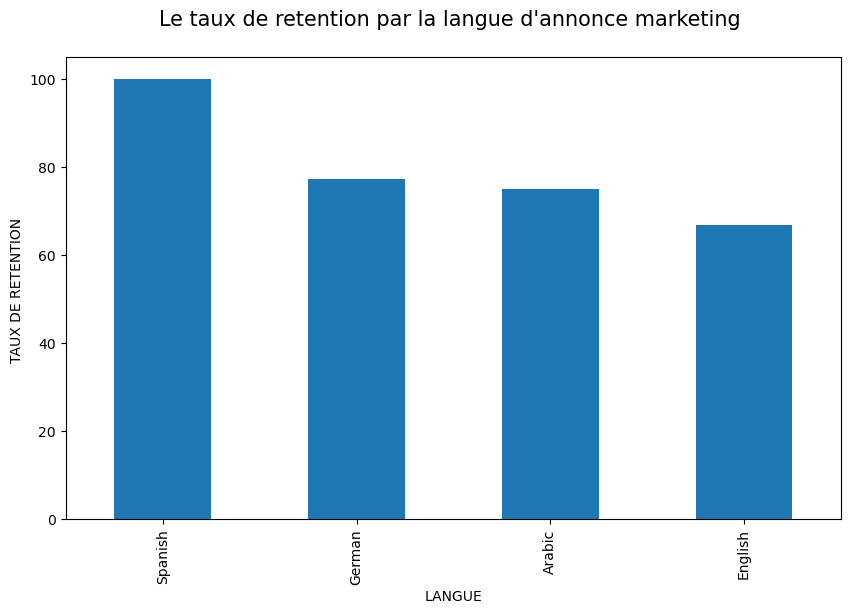

In [48]:
plt.figure(figsize=(10,6)),
taux_retention_par_langue.sort_values(ascending=False).plot(kind="bar"),
plt.xlabel("LANGUE"),
plt.ylabel("TAUX DE RETENTION "),
plt.title("Le taux de retention par la langue d'annonce marketing \n", fontsize=15)
plt.show();

L'Espagnol offre le meilleur taux d'annonce 100 % 

# Taux de conversion par canal d'acquisition

#  nombre  d'utilisateurs unique ayant souscrit au service

In [49]:
n_souscripteurs_par_canal=marketing_df[marketing_df['converted']==True].groupby('subscribing_channel')['user_id'].nunique()
n_souscripteurs_par_canal

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64

In [ ]:
# nombre total de personnes atteintes par la campagne pour chaque canal

In [50]:
total_per_canal=marketing_df.groupby('subscribing_channel')['user_id'].nunique()
total_per_canal

subscribing_channel
Email        192
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64

In [51]:
taux_conv_per_canal=(n_souscripteurs_par_canal / total_per_canal)*100
taux_conv_per_canal.sort_values(ascending=False)

subscribing_channel
Facebook     100.000000
House Ads    100.000000
Instagram    100.000000
Push         100.000000
Email         83.854167
Name: user_id, dtype: float64

# Automatisation du calcul du taux de conversion

on va crée une fonction

In [52]:
def conversion_rate(dataframe, column_names):
    # nombres total d'utilisateurs convertis
    column_conv=dataframe[dataframe['converted']==True].groupby(column_names)['user_id'].nunique()
    # Nombres total d'utilisateur
    
    column_total=dataframe.groupby(column_names)['user_id'].nunique()
    
    # Taux de conversion
    conversion_rate= (column_conv / column_total)
    
    # Remplacement des valeurs manquantes par 0
    conversion_rate=conversion_rate.fillna(0)
    
    
    return conversion_rate

vérification

In [53]:
conversion_rate(marketing_df, ["subscribing_channel"])

subscribing_channel
Email        0.838542
Facebook     1.000000
House Ads    1.000000
Instagram    1.000000
Push         1.000000
Name: user_id, dtype: float64

la fonction marche bien car on a le meme résultat que précédemment

# taux de conversion par langue d'annonce

on veut calculer le taux de conversion pour chacune des langues d'annonce afin de savoir laquelle est plus efficace pour la campagne

In [54]:
taux_conv_par_langue=conversion_rate(marketing_df, ["language_displayed"])
taux_conv_par_langue

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64

l'Allemagne offre le meilleur taux de conversion de 72% et un taux de rétention de 77%.
Nous avons vu que l'Espagnol à le meilleur taux de rétention 100%, ici on voit que pour les annonces, cette langue présente un taux de conversion de 20%

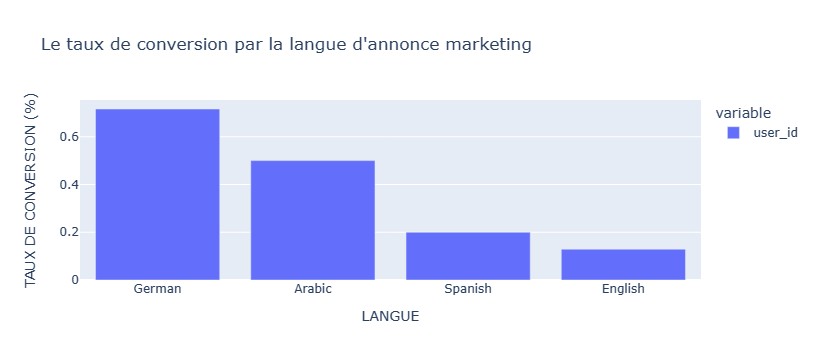

In [99]:

fig_lang_annonce = px.bar(
   taux_conv_par_langue.sort_values(ascending=False),
   title="Le taux de conversion par la langue d'annonce marketing"
)
fig_lang_annonce.update_layout(xaxis_title="LANGUE", yaxis_title="TAUX DE CONVERSION (%)")
fig_lang_annonce.show()

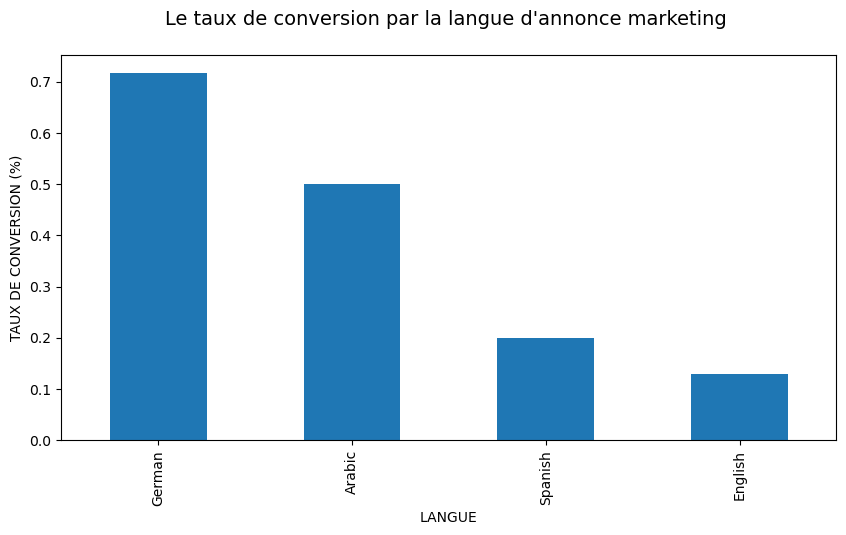

In [56]:
plt.figure(figsize=(10,5)),
taux_conv_par_langue.sort_values(ascending=False).plot(kind="bar"),
plt.xlabel("LANGUE"),
plt.ylabel("TAUX DE CONVERSION (%)"),
plt.title("Le taux de conversion par la langue d'annonce marketing \n", fontsize=14)
plt.show();

Les campagnes marketing en Allemand semblent etre plus efficaces que celles dans les autres langues en termes de conversion des utilisateurs.

# Taux de conversion de conversion journalier

In [57]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
 12  channels_code        1856 non-null   float64       
 13  is_correct_lang      10037 non-

In [58]:
taux_conv_journalier=conversion_rate(marketing_df, ["date_served"])
taux_conv_journalier

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64

# transformation du réultat en dataframe

In [59]:
taux_conv_journalier=pd.DataFrame(taux_conv_journalier.reset_index())
taux_conv_journalier.head()                                  

,date_served,user_id
0,2018-01-01,0.099448
1,2018-01-02,0.098930
2,2018-01-03,0.103448
3,2018-01-04,0.108359
4,2018-01-05,0.125392


jusqu'a présent nous avons calculé des taux de rétention et de conversion en fonction d'une seule variable.Il est posiible de considérer plus d'une variable.

# taux de conversion journalier par groupe d'ages #

In [60]:
daily_conv_rate_age_group=conversion_rate(marketing_df, ["date_served", "age_group"])
daily_conv_rate_age_group

date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
                              ...   
2018-01-31   24-30 years    0.057692
             30-36 years    0.000000
             36-45 years    0.035088
             45-55 years    0.023256
             55+ years      0.026316
Name: user_id, Length: 217, dtype: float64

transformation  de ce réultat en dataframe 

 # level=1 car cest la variable age_group qu'on veut désemballer
    l'indexation dans python commence par 0

In [61]:
daily_conv_rate_age_group=pd.DataFrame(daily_conv_rate_age_group.unstack(level=1))
daily_conv_rate_age_group

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
date_served,,,,,,,
2018-01-01,0.155172,0.196721,0.105263,0.040816,0.042553,0.022222,0.086957
2018-01-02,0.180328,0.164384,0.114754,0.040000,0.043478,0.043478,0.024390
2018-01-03,0.102041,0.208955,0.150943,0.042553,0.060000,0.047619,0.043478
2018-01-04,0.117647,0.200000,0.183673,0.045455,0.043478,0.061224,0.073171
2018-01-05,0.142857,0.250000,0.136364,0.090909,0.068182,0.046512,0.088889
2018-01-06,0.120000,0.188679,0.145833,0.078947,0.073171,0.068182,0.078947
2018-01-07,0.128205,0.220000,0.153846,0.100000,0.111111,0.128205,0.117647
2018-01-08,0.142857,0.196078,0.140000,0.069767,0.069767,0.051282,0.102564
2018-01-09,0.148936,0.200000,0.152174,0.090909,0.093023,0.068182,0.102564


# visualisation

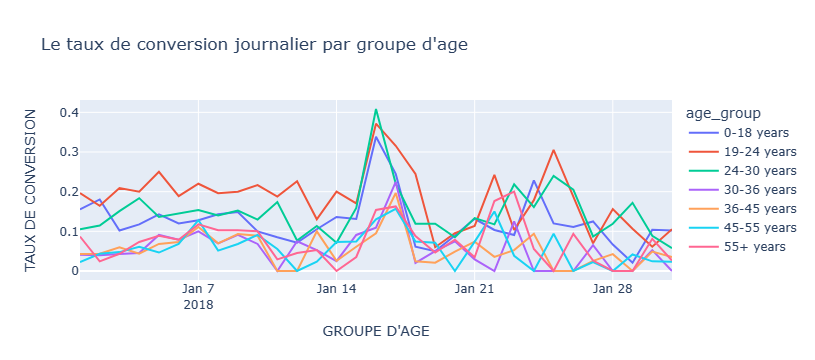

In [97]:

fig_groupe_age = px.line(
    daily_conv_rate_age_group,
    title="Le taux de conversion journalier par groupe d'age\n"
    
)
fig_groupe_age.update_layout(xaxis_title="GROUPE D'AGE", yaxis_title="TAUX DE CONVERSION")
fig_groupe_age.show()

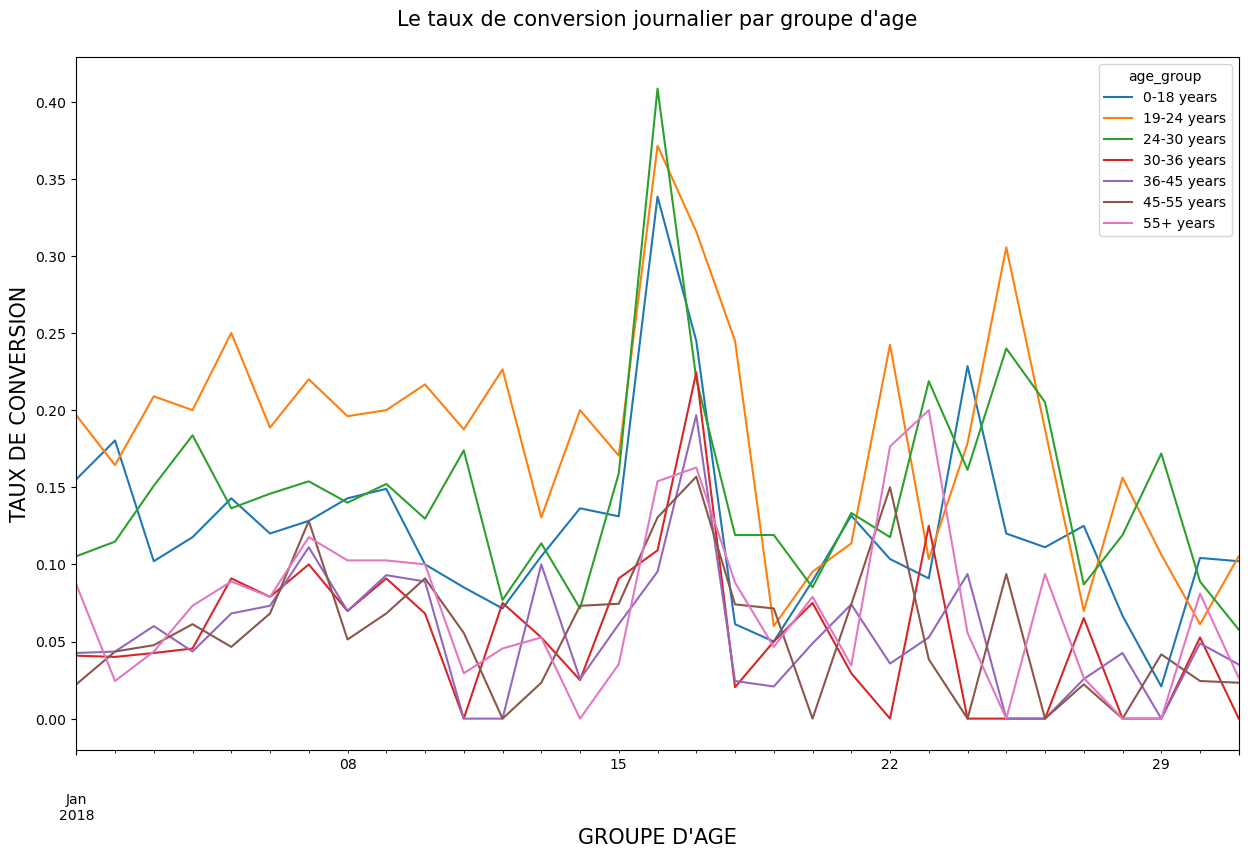

In [108]:
daily_conv_rate_age_group.plot(kind="line", figsize=(15,9)),
plt.title("Le taux de conversion journalier par groupe d'age\n", size=15),
plt.ylabel("TAUX DE CONVERSION", size=15),
plt.xlabel("GROUPE D'AGE", size=15 ),
plt.show();

# Taux de conversion journalier par canal marketing

In [66]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
 12  channels_code        1856 non-null   float64       
 13  is_correct_lang      10037 non-

In [63]:
daily_conv_rate_canal=conversion_rate(marketing_df, ["date_served", "marketing_channel"])
daily_conv_rate_canal

date_served  marketing_channel
2018-01-01   Email                1.000000
             Facebook             0.117647
             House Ads            0.084656
             Instagram            0.106667
             Push                 0.083333
                                    ...   
2018-01-31   Email                1.000000
             Facebook             0.078947
             House Ads            0.038217
             Instagram            0.041096
             Push                 0.052632
Name: user_id, Length: 155, dtype: float64

In [64]:
daily_conv_rate_canal=pd.DataFrame(daily_conv_rate_canal.unstack(level=1))
daily_conv_rate_canal.head()

marketing_channel,Email,Facebook,House Ads,Instagram,Push
date_served,,,,,
2018-01-01,1.0,0.117647,0.084656,0.106667,0.083333
2018-01-02,1.0,0.098361,0.077982,0.129032,0.055556
2018-01-03,0.0,0.080645,0.088542,0.171875,0.083333
2018-01-04,0.5,0.138462,0.089820,0.126984,0.058824
2018-01-05,1.0,0.112903,0.126582,0.159420,0.027778


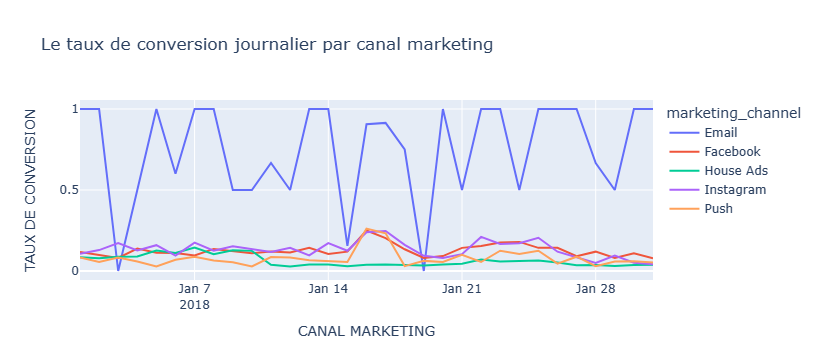

In [95]:
# Create line plot of `inertia_errors` vs `n_clusters`
fig_canal_marketing = px.line(
    daily_conv_rate_canal,
    title="Le taux de conversion journalier par canal marketing\n"
    
)
fig_canal_marketing.update_layout(xaxis_title="CANAL MARKETING", yaxis_title="TAUX DE CONVERSION\n")
fig_canal_marketing.show()

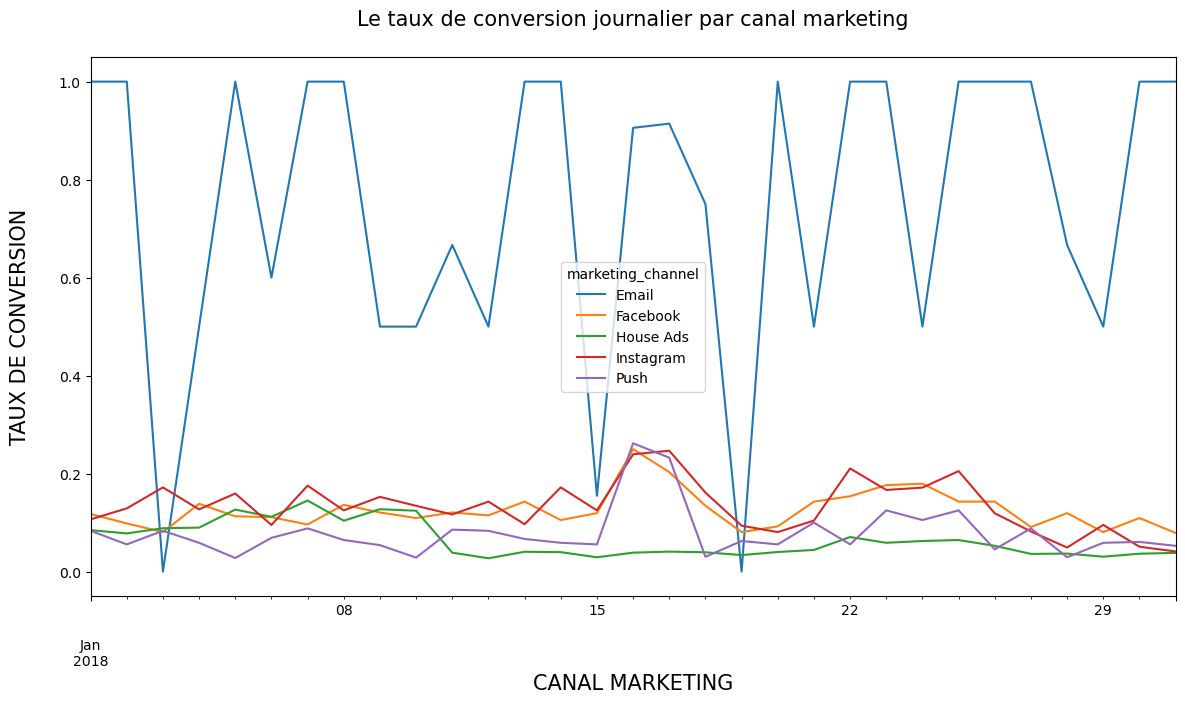

In [66]:
daily_conv_rate_canal.plot(kind="line", figsize=(14,7)),
plt.title("Le taux de conversion journalier par canal marketing\n", size=15),
plt.ylabel("TAUX DE CONVERSION\n", size=15),
plt.xlabel("CANAL MARKETING", size=15 ),
plt.show();

# taux de canal marketing par jour de seiane et par canal marketing

les utilisateurs sont-ils plus susceptible de se convertir le weekend par rapport aux autres jours de la semaine?

# colonne jour de la semaine ou l'annonce a  été diffusée

In [67]:
marketing_df["Dow_served"]=marketing_df["date_served"].dt.dayofweek
marketing_df["Dow_served"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10032    2.0
10033    2.0
10034    4.0
10035    2.0
10036    5.0
Name: Dow_served, Length: 10037, dtype: float64

In [70]:
Dow_conversion=conversion_rate(marketing_df, ["Dow_served", "marketing_channel"])
Dow_conversion

Dow_served  marketing_channel
0.0         Email                0.162621
            Facebook             0.119601
            House Ads            0.062660
            Instagram            0.122517
            Push                 0.064516
1.0         Email                0.906250
            Facebook             0.147887
            House Ads            0.070312
            Instagram            0.151943
            Push                 0.115854
2.0         Email                0.837209
            Facebook             0.127036
            House Ads            0.075269
            Instagram            0.150160
            Push                 0.105882
3.0         Email                0.727273
            Facebook             0.133333
            House Ads            0.059034
            Instagram            0.143498
            Push                 0.067797
4.0         Email                0.666667
            Facebook             0.110132
            House Ads            0.062278
    

In [71]:
Dow_df=pd.DataFrame(Dow_conversion.unstack(level=1))
Dow_df

marketing_channel,Email,Facebook,House Ads,Instagram,Push
Dow_served,,,,,
0.0,0.162621,0.119601,0.062660,0.122517,0.064516
1.0,0.906250,0.147887,0.070312,0.151943,0.115854
2.0,0.837209,0.127036,0.075269,0.150160,0.105882
3.0,0.727273,0.133333,0.059034,0.143498,0.067797
4.0,0.666667,0.110132,0.062278,0.129870,0.055556
5.0,0.818182,0.109375,0.057566,0.088710,0.069767
6.0,0.750000,0.116071,0.065217,0.127193,0.065574


# taux de conversion en fonction du jour de la semaine

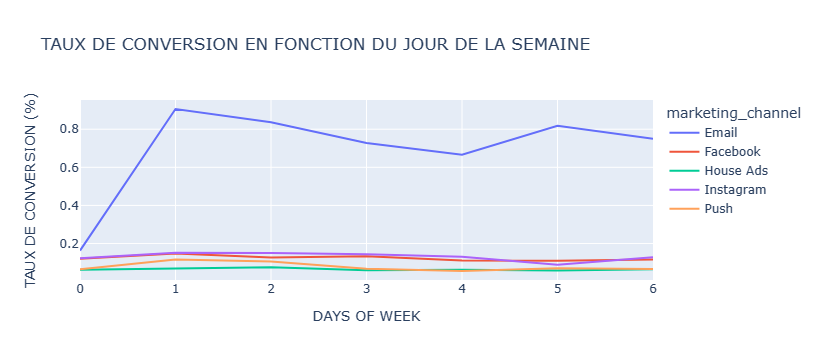

In [91]:
# Create line plot of `inertia_errors` vs `n_clusters`
fig_conv_jour = px.line(
    Dow_df,
    title="TAUX DE CONVERSION EN FONCTION DU JOUR DE LA SEMAINE\n"
    
)
fig_conv_jour.update_layout(xaxis_title="DAYS OF WEEK", yaxis_title="TAUX DE CONVERSION\n(%)")
fig_conv_jour.show()

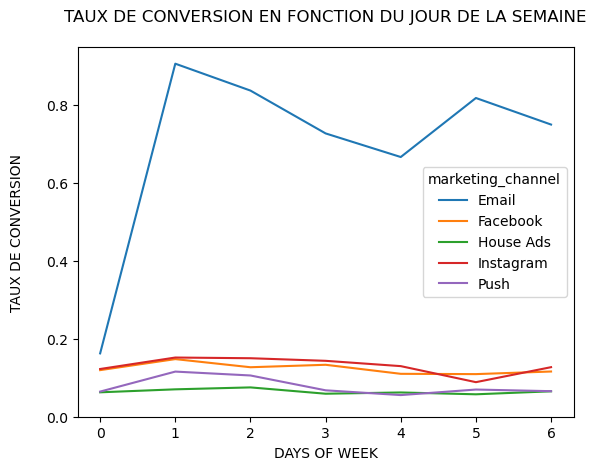

In [73]:
Dow_df.plot(),
plt.xlabel("DAYS OF WEEK"),
plt.ylabel("TAUX DE CONVERSION\n"),
plt.title("TAUX DE CONVERSION EN FONCTION DU JOUR DE LA SEMAINE\n")
plt.ylim(0);

Nous avons calculé le taux de conversion et le taux de rétention pour divers segment ou combinaison de segments.
Il y'a d'autres analyse que vous pouvez effectuer.

# Préférences journalieres linguistiques des utilisateurs

In [94]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
 12  channels_code        1856 non-null   float64       
 13  is_correct_lang      10037 non-

In [74]:
n_lang_per_date=marketing_df.groupby(["date_served", "language_preferred"])["user_id"].nunique()
n_lang_per_date

date_served  language_preferred
2018-01-01   Arabic                  4
             English               342
             German                  5
             Spanish                11
2018-01-02   Arabic                  4
                                  ... 
2018-01-30   Spanish                19
2018-01-31   Arabic                  8
             English               310
             German                  5
             Spanish                17
Name: user_id, Length: 121, dtype: int64

# Transformation de ce résultat en dataframe

# level=1 car c'est le deuxième index ("language_préféred") qu'on veut désempiler

In [75]:
n_lang_per_date=pd.DataFrame(n_lang_per_date.unstack(level=1))
n_lang_per_date.head()

language_preferred,Arabic,English,German,Spanish
date_served,,,,
2018-01-01,4.0,342.0,5.0,11.0
2018-01-02,4.0,355.0,5.0,10.0
2018-01-03,3.0,334.0,3.0,8.0
2018-01-04,2.0,305.0,2.0,14.0
2018-01-05,1.0,303.0,2.0,14.0


# visualisation du résultat

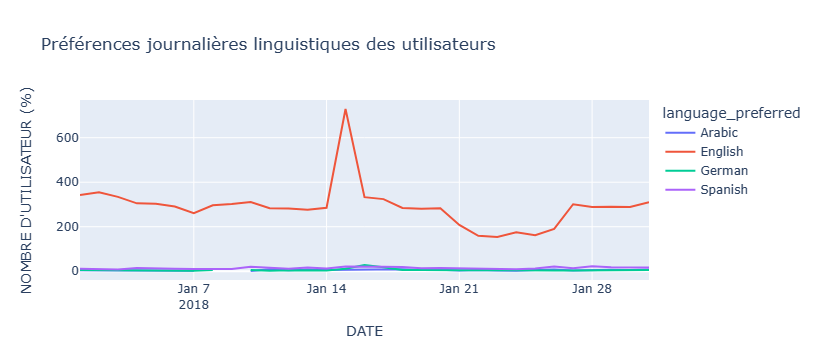

In [92]:

fig_line_jour = px.line(
    n_lang_per_date,
    title="Préférences journalières linguistiques des utilisateurs\n"
    
)
fig_line_jour.update_layout(xaxis_title="DATE", yaxis_title="NOMBRE D'UTILISATEUR\n(%)")
fig_line_jour.show()

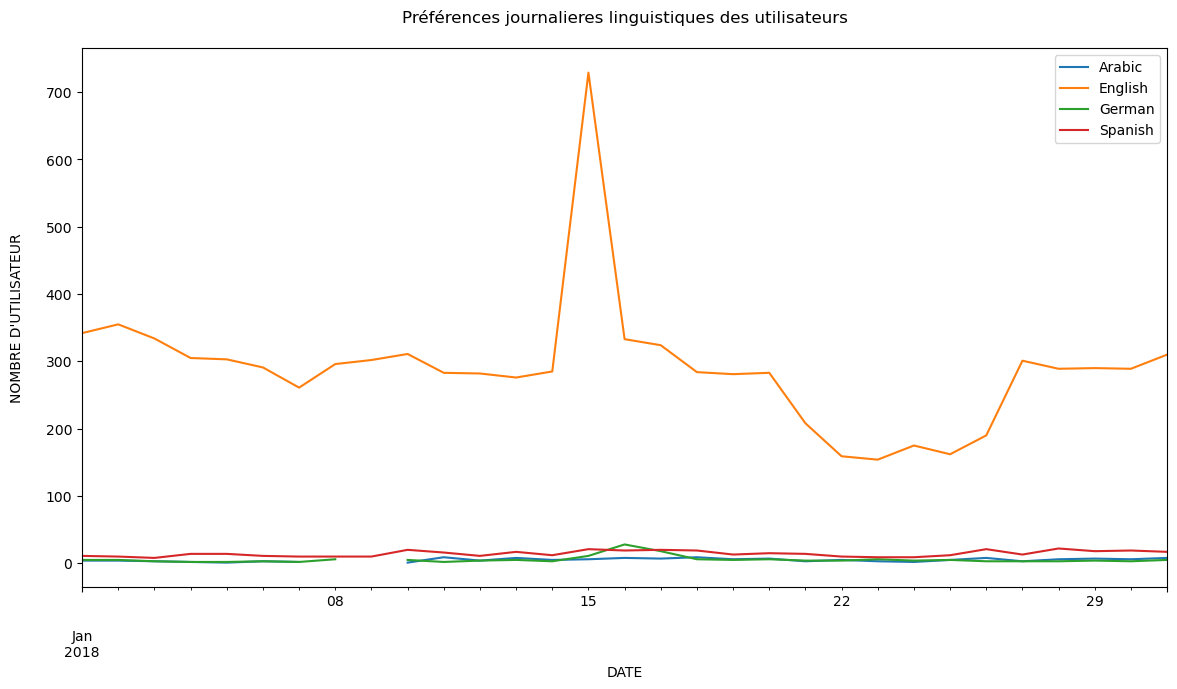

In [77]:
n_lang_per_date.plot(figsize=(14, 7)),
plt.xlabel("DATE"),
plt.ylabel("NOMBRE D'UTILISATEUR\n"),
plt.title("Préférences journalieres linguistiques des utilisateurs\n")
plt.legend(loc='upper right', labels=n_lang_per_date.columns.values)
plt.show();

comme nous avons vu précédemment, la langue plus populaire est de loin l'anglais

# préférence linguistique par groupe d'age

# nombres d'utilisateurs par groupe d'age et par langues préférées

In [78]:
n_lang_per_age=marketing_df.groupby(["age_group", "language_preferred"])["user_id"].nunique()
n_lang_per_age

age_group    language_preferred
0-18 years   Arabic                  16
             English               1126
             German                  24
             Spanish                 43
19-24 years  Arabic                  18
             English               1218
             German                  23
             Spanish                 51
24-30 years  Arabic                  16
             English               1121
             German                  29
             Spanish                 54
30-36 years  Arabic                  12
             English                978
             German                  12
             Spanish                 57
36-45 years  Arabic                  13
             English                993
             German                  14
             Spanish                 39
45-55 years  Arabic                  14
             English                978
             German                  20
             Spanish                 47
55+ year

In [79]:
n_lang_per_age=pd.DataFrame(n_lang_per_age.unstack(level=1))
n_lang_per_age

language_preferred,Arabic,English,German,Spanish
age_group,,,,
0-18 years,16,1126,24,43
19-24 years,18,1218,23,51
24-30 years,16,1121,29,54
30-36 years,12,978,12,57
36-45 years,13,993,14,39
45-55 years,14,978,20,47
55+ years,17,922,9,34


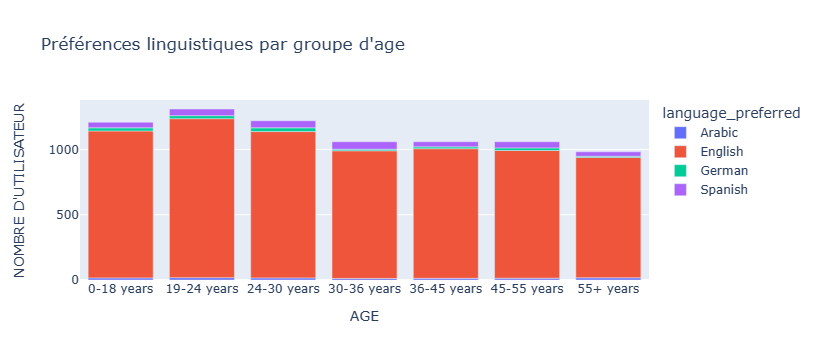

In [80]:
# Create side-by-side bar chart of `xgb`
fig_lang = px.bar(
   n_lang_per_age, 
   title="Préférences linguistiques par groupe d'age\n"
)
fig_lang.update_layout(xaxis_title="AGE", yaxis_title="NOMBRE D'UTILISATEUR\n")
fig_lang.show()

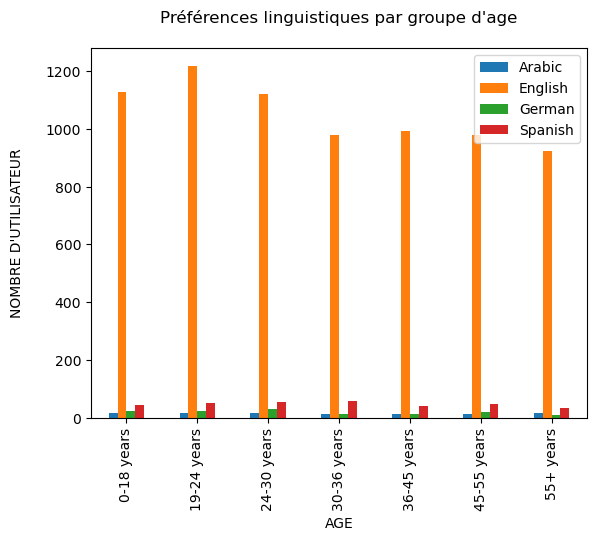

In [81]:
n_lang_per_age.plot(kind="bar"),
plt.xlabel("AGE"),
plt.ylabel("NOMBRE D'UTILISATEUR\n"),
plt.title("Préférences linguistiques par groupe d'age\n")
plt.legend(loc='upper right', labels=n_lang_per_date.columns.values)
plt.show();

l'Anglais demeure la langue préféreée quelque soit le groupe d'age

# CANAUX MARKETING SELON LES GROUPES  D'AGES 

supposons que les décideurs de l'entrprise veulent
savoir si les canaux marketing atteignent tous les utilisateurs de manière égale ou s'il y'a une différence.
Nous allons donc créer un graohique indiquant le nombres de personnes atteintes parchaque canal marketing par age.

In [83]:
canal_age=marketing_df.groupby(["age_group", "marketing_channel"])["user_id"].nunique()
canal_age

age_group    marketing_channel
0-18 years   Email                 91
             Facebook             256
             House Ads            585
             Instagram            292
             Push                 184
19-24 years  Email                107
             Facebook             331
             House Ads            643
             Instagram            301
             Push                 144
24-30 years  Email                116
             Facebook             289
             House Ads            587
             Instagram            268
             Push                 180
30-36 years  Email                 60
             Facebook             238
             House Ads            600
             Instagram            252
             Push                  83
36-45 years  Email                 63
             Facebook             217
             House Ads            505
             Instagram            268
             Push                 192
45-55 years  Email 

In [84]:
canal_age=pd.DataFrame(canal_age.unstack(level=1))
canal_age.head()

marketing_channel,Email,Facebook,House Ads,Instagram,Push
age_group,,,,,
0-18 years,91,256,585,292,184
19-24 years,107,331,643,301,144
24-30 years,116,289,587,268,180
30-36 years,60,238,600,252,83
36-45 years,63,217,505,268,192


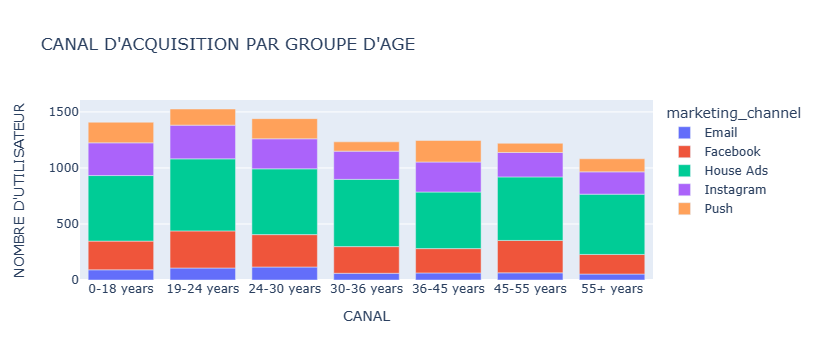

In [85]:
# Create side-by-side bar chart of `xgb`
fig_channel = px.bar(
   canal_age,
   title="CANAL D'ACQUISITION PAR GROUPE D'AGE\n"
)
fig_channel.update_layout(xaxis_title="CANAL", yaxis_title="NOMBRE D'UTILISATEUR\n")
fig_channel.show()

In [104]:
# importation des librairies
import dash
from dash import Input, Output, State, dcc, html
import dash_core_components as dcc
from jupyter_dash import JupyterDash
app = JupyterDash(__name__)
app.layout = html.Div( 
    [
        # Application title
        html.H1("Analyse de la campagne marketing"),
        dcc.Graph(id= "line-graph", figure=fig_line_look),
        dcc.Graph(id= "line-graph", figure=fig_line_jour),
        dcc.Graph(id= "line-graph", figure=fig_conv_jour),
        dcc.Graph(id= "line-graph", figure=fig_canal_marketing),
        dcc.Graph(id= "line-graph", figure=fig_groupe_age),
        dcc.Graph(id= "lang-graph", figure=fig_lang),
        dcc.Graph(id= "bar-graph", figure=fig_channel),
        dcc.Graph(id= "bar-graph", figure=fig_lang_annonce),
        dcc.Graph(id= "bar-graph", figure=fig_lang_retention),
        dcc.Graph(id= "bar-graph", figure=fig_channel),
        # Bar chart element
        # bar chart graph
        dcc.Graph(id= "example-graph", figure=bar_fig),
    ]
)
if __name__ == "__main__":
    app.run(jupyter_mode="external")

C:\Users\lenovo\anaconda3\lib\site-packages\dash\dash.py:538: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



Dash app running on http://127.0.0.1:8050/


In [ ]:
# Create line plot of `inertia_errors` vs `n_clusters`
fig = px.line(
    n_lang_per_date,
    title="Préférences journalières linguistiques des utilisateurs\n"
    
)
fig.update_layout(xaxis_title="DATE", yaxis_title="NOMBRE D'UTILISATEUR\n(%)")
fig.show()

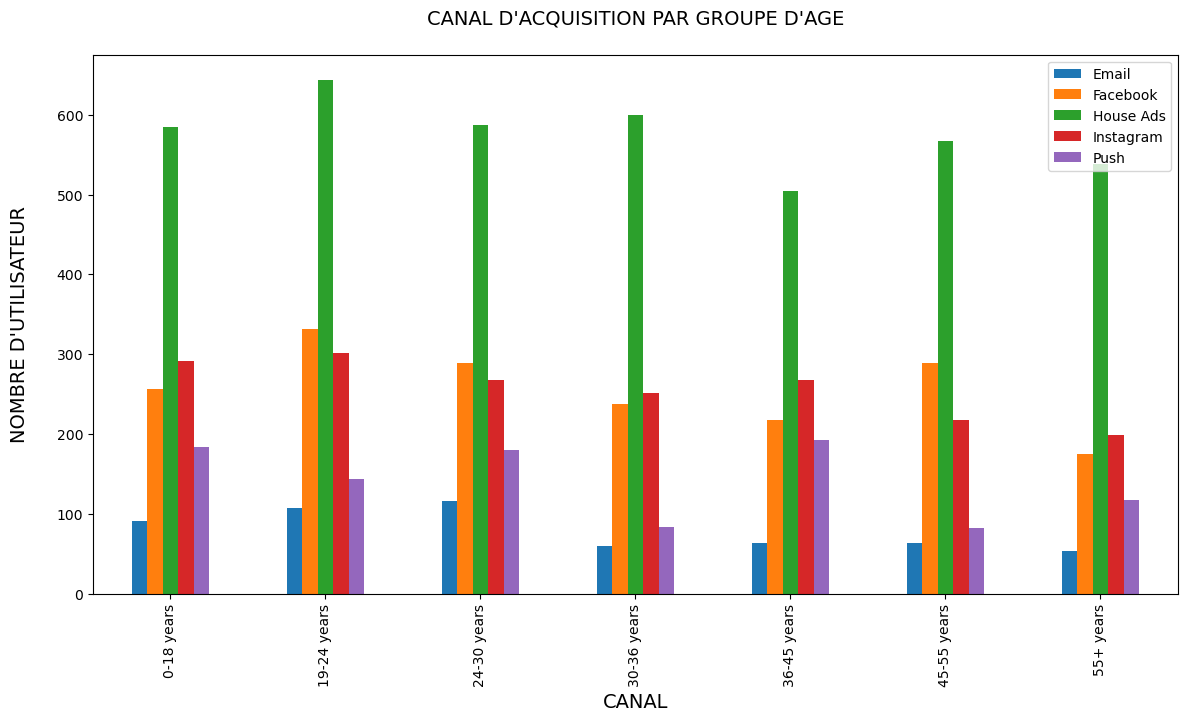

In [131]:
canal_age.plot(kind="bar", figsize=(14,7)),
plt.xlabel("CANAL", size=14),
plt.ylabel("NOMBRE D'UTILISATEUR\n", size=14),
plt.title("CANAL D'ACQUISITION PAR GROUPE D'AGE\n", size=14)
plt.legend(loc='upper right', labels=canal_age.columns.values)
plt.show();

# conclusion

Le marketing est l'un des départements stratétégiques  les plus important pour une entreprise.pouvoir analyser les données clients  afin d'en tirer les informations utiles est une compétence hautement importante.Pandas est une librairie très puissance pour l'analyse des données avec python.
A travers ce projet, nous avons utilisé quelques  fonctionnalités de pandas afin d'effectuer une analyse descriptive de la campagne marketing d'une entreprise de services en ligne.